In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#### Data indlæses i dataframe ####

In [6]:
# Opretter en simpel datasæt med tekst og sentiment columns
data = pd.DataFrame([("i love spending time with my friends and family", "positive"),
                     ("that was the best meal i've ever had in my life", "positive"),
                     ("i feel so grateful for everything i have in my life", "positive"),
                     ("i received a promotion at work and i couldn't be happier", "positive"),
                     ("watching a beautiful sunset always fills me with joy", "positive"),
                     ("my partner surprised me with a thoughtful gift and it made my day", "positive"),
                     ("i am so proud of my daughter for graduating with honors", "positive"),
                     ("listening to my favorite music always puts me in a good mood", "positive"),
                     ("i love the feeling of accomplishment after completing a challenging task", "positive"),
                     ("i am excited to go on vacation next week", "positive"),
                     ("i feel so overwhelmed with work and responsibilities", "negative"),
                     ("the traffic during my commute is always so frustrating", "negative"),
                     ("i received a parking ticket and it ruined my day", "negative"),
                     ("i got into an argument with my partner and we're not speaking", "negative"),
                     ("i have a headache and i feel terrible", "negative"),
                     ("i received a rejection letter for the job i really wanted", "negative"),
                     ("my car broke down and it's going to be expensive to fix", "negative"),
                     ("i'm feeling sad because i miss my friends who live far away", "negative"),
                     ("i'm frustrated because i can't seem to make progress on my project", "negative"),
                     ("i'm disappointed because my team lost the game", "negative")
                    ],
                    columns=['text', 'sentiment'])

#### Shuffle dataet & drop old index ###

In [7]:
# Shuffle data og drop det gamle index
data = data.sample(frac=1).reset_index(drop=True)

#### Forbered data (X og Y) ####

In [8]:
# X indeholder 'text', y indeholder 'sentiment'
X = data['text']
y = data['sentiment']

### Vectorization (tekst -> tal) ####
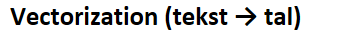

In [9]:
# Opret CountVectorizer objekt
countvec = CountVectorizer()

In [10]:
# Fit_transform gør 2 ting
# Fit lære alle unikke ord i datasæt
# Derefter tasnsformer den hver tekst til en række af tal
countvec_fit = countvec.fit_transform(X)

In [11]:
# countvec_fit.toarray() -> Konverterer sparse matrix til en almindelig array
# columns = countvec.get_feature_names_out() -> Henter alle unikke ord som kolonne navne
bag_of_words = pd.DataFrame(countvec_fit.toarray(), columns = countvec.get_feature_names_out())

### Split data i Train og Test set ####

In [15]:
# data der trænes på = X_train og y_train
# data der testes på = X_test og y_test
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size=0.3, random_state = 7)

### Logistic Regression model trænes ####

In [19]:
# Opret og træn Logistic Regression model mede x_train og y_train
# fit træner modellen til at finde patterns
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [18]:
# Lav prediction på X_test
# predict laver forudsigelser baseret på det modellen har lært
y_pred_lr = lr.predict(X_test)

### Evaluer model performance ####

In [20]:
accuracy_score(y_pred_lr, y_test)

0.16666666666666666

### Print en detaljeret klassifikationsrapport ####

In [24]:
print(classification_report(y_test, y_pred_lr, zero_division=0))

              precision    recall  f1-score   support

    negative       0.25      0.33      0.29         3
    positive       0.00      0.00      0.00         3

    accuracy                           0.17         6
   macro avg       0.12      0.17      0.14         6
weighted avg       0.12      0.17      0.14         6

